## Contents 

1. [Introduction](#10)<br>
2. [Load Packages](#20)<br>
    A. [Import](#21)<br>
    B. [Setup](#22)<br>
    C. [Version](#233)<br>
3. [Problem Definition](#30)<br>
    A. [Variables](#311)<br>
4. [Exploratory Data Analysis(EDA)](#40) </b><br>
    A. [Data Collection](#411)<br>
    B. [Data Visualization](#420)<br>
    B.1 [Univariate Visualization](#4211)<br>
    B.2 [Multivariate Visualization](#4222)<br>
    C. [Data Preprocessing](#430)<br> 
    C.1[Model Resampling](#431)<br>
    C.2[Feature Importance](#432)<br>
    C.3[Normalize Data](#433)<br>
5. [Model developement](#5)<br>
    A. [XGBoost](#51)<br>
    B. [PCA](#52)<br>
    C. [GridSeachCV](#53)<br>
    D. [RandomForestClassifer](#54)<br>  
    E. [AdaboostClassifier](#55)<br>
    F. [CatboostClassifier](#56)<br>
    G. [Keras](#57)<br>
6. [References](#7)<br>

<a id="10"></a>
### 1. Introduction

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.<br>
In this challange our goal is to identify fraudulent credit card transactions based on the provided dataset.

<a id="20"></a>
### 2. Load Packages

<a id="21"></a>
##### A. Import

In [2]:
#important libraries
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.gridspec as gridspec
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import geopandas as gpd
import re

#classifier libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
import xgboost as xgb
import collections


#other important libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import accuracy_score,classification_report, f1_score, roc_auc_score, recall_score, precision_score
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import sys
import warnings
warnings.filterwarnings('ignore');

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

<a id='22'></a>
##### B. Setup

In [3]:
#train_validation_test split
valid_size = 0.20 #simple validation using train_test_split
test_size = 0.20 #simple test using train_test_split

#cross_validation
num_kfold = 5 #number of kfold for cross validation


random_state = 42


max_rounds = 1000 #lgb iterations
early_stop = 50 #lgb early stop
opt_round = 1000 #to be adjusted based on best validation rounds
verbose_eval = 50 #print out metric result

<a id="233"></a>
##### C. Version

In [4]:
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))


Pandas: 1.0.3
Numpy: 1.17.0
Python: 3.7.1 | packaged by conda-forge | (default, Mar 13 2019, 13:32:59) [MSC v.1900 64 bit (AMD64)]


<a id="30"></a>
### 3. Problem Definition

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in **two days**, where we have 492 frauds out of 284,807 transactions. The dataset is **highly imbalanced**, the positive class (frauds) account for 0.172% of all transactions.

<a id="311"></a>
##### A. Variables

- Features V1, V2, … V28 are the principal components obtained with PCA.
- The only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

<a id='40'></a>
## 4. Exploratory Data Analysis(EDA)

<a id='411'></a>
### A. Data Collection 

In [9]:
df = pd.read_csv('creditcarddata.csv')
#df=df.head(30000)

In [10]:
df.shape #shows the number of rows and columns respectively

(284807, 31)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

As info method showed,we have 30 columns with the type of float64 and 1 columns with the type of int64.

The describe method for numerical data provide information which include count, mean, std(standars deviation), min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.

In [12]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Looking at the time column, the max is 172792 seconds which shows that the dataset contains 2 consecutive  days.<br>
3600sx24h=86400 seconds in one day.<br>
86400sx2=172,800 seconds which is almost 172,792 secodns.

Also, looking at the amount column, the amount transactioned is not reletively large, the mean and median of the amount column is 88.34 dollars and 22 dollars respectively.

In [14]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Sounds great, we don't have any null values in our dataset.

In [15]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<a id='420'></a>
### B. Data Visualization

In this section, I will do **Univariate Visualization** and **Multivariate Visualization** as follow:

**A- Univariate Visualization:**<br>
    - Class (Qualitative)<br>
    - Amount (Qualitative)<br>
    - Time (Quantitative)<br>

**B- Multivariate Visualization:**<br>
    - Class vs. Amount (Qualitative vs. Qualitative)<br>
    - Class vs. Time (Qualitative va. Quantitative)<br>
    - Whole dataset visualization<br>
    - Feature Correlation<br>

<a id='4211'></a>
##### A. Univariate Visualization

#### Class

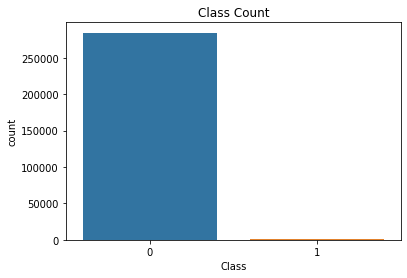

In [16]:
sns.countplot(x='Class', data=df)
plt.title('Class Count');

As countplot shows, we have a heavily imbalanced class of data. Let's check what is the distribution of the normal vs. fraud tranaction in the class. 

In [17]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [18]:
print('The normal(0) vs. fraud(1) transaction percentage is:')
df['Class'].value_counts(normalize=True)

The normal(0) vs. fraud(1) transaction percentage is:


0    0.998273
1    0.001727
Name: Class, dtype: float64

Yes, we have a very imbalanced class of dataset which needs to be fixed. Most of the tranactions are normal (non-fraud) transactions which is true in real life. However, if we use the dataset as it is, our predictive model assume that most of the transactions are non-fraud and our model leads to **Overfit**. We have to use techniques such as **Resampling** to fix this problem.

#### Amount

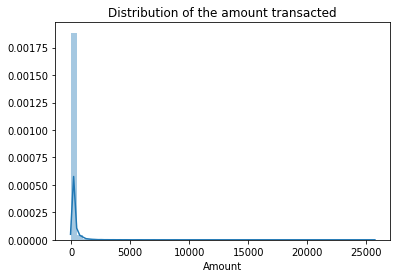

In [19]:
sns.distplot(df['Amount'])
plt.title('Distribution of the amount transacted');

We have a very long positive tail towards the right for the amount and it is not normally distributed. One general idea is that whenever we have a heavy tail distribution, we can transform it (by computing their logarithm).

#### Time

In [20]:
#I will do some feature engineering here and transform the time from second to minuets and hour.
#By looking at the time in seconds, minutes and hours rather than all in seconds, we will get better insight.

timedelta = pd.to_timedelta(df['Time'], unit='s')
timedelta

0        0 days 00:00:00
1        0 days 00:00:00
2        0 days 00:00:01
3        0 days 00:00:01
4        0 days 00:00:02
               ...      
284802   1 days 23:59:46
284803   1 days 23:59:47
284804   1 days 23:59:48
284805   1 days 23:59:48
284806   1 days 23:59:52
Name: Time, Length: 284807, dtype: timedelta64[ns]

In [21]:
#creating new column from all time in seconds to minutes, and hours.
df['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

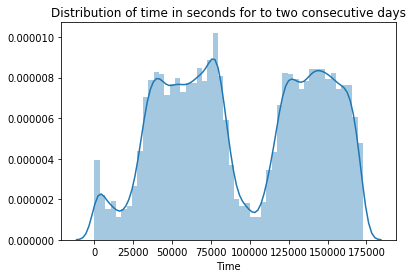

In [23]:
sns.distplot(df['Time'])
plt.title('Distribution of time in seconds for to two consecutive days');

We can clearly observe that there are two days in "Time" column.

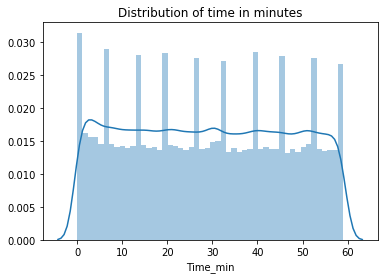

In [24]:
sns.distplot(df['Time_min'])
plt.title('Distribution of time in minutes');

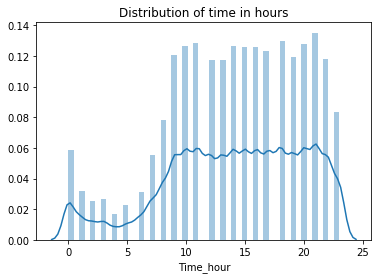

In [25]:
sns.distplot(df['Time_hour'])
plt.title('Distribution of time in hours');

We couldn't get a lot of information in this phase from time in seconds and minutes but time in hours could help us get more details about transaction time.<br>

Here, we can see that we don't have a lot of transactions during the sleep period from 1 AM to 6 AM but the transaction pick begins from 9 AM to 22 PM.

<a id='4222'></a>
##### B. Multivariate Visualization

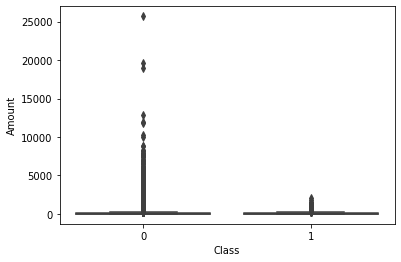

In [26]:
#Class vs. Amount (Qualitative vs. Qualitative)
sns.boxplot(x='Class', y='Amount', data=df);

Not very informative. from the Amount plot in the univariate visualization, we found that the Amount plot has a very heavy right tail. Hence it is a good idea to use log transformation and get a log_normal distribution on the Amount. 

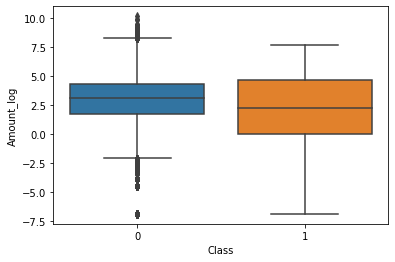

In [27]:
df['Amount_log'] = np.log(df['Amount'] + 0.001) #normalize amount for visualization
sns.boxplot(x='Class', y='Amount_log', data=df);

Let's also try violinplot to see if we can get more insight from our plots. 

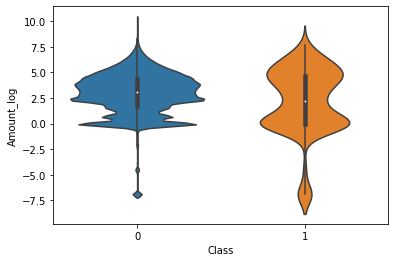

In [28]:
sns.violinplot(x='Class', y='Amount_log', data=df);

**Some intersting observations from Violinplot:**

1- The thick gray bar in the center shows that the interquartile range of the class non_fraud (0) is less than the fraud (1) class. 

2- The white dot which represents the median shows that the median of the class non_fraud is slightly more than the class fraud.

3- The distribution of the data around the median for non_fraud class is much wider than the distribution of the fraud class around the median. As you can see, in the fraud class, the distribution of the data around the median gets very skinny. 

4- Also, from the boxplot we can see than most of the outliers and high Amounts is for the non_fraud class. 

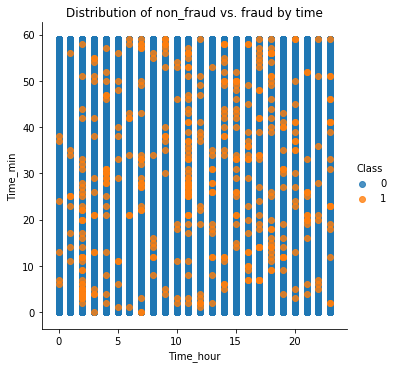

In [29]:
#Class vs. Time (Qualitative va. Quantitative)
sns.lmplot('Time_hour', 'Time_min', data=df, hue='Class', fit_reg=False)
plt.title('Distribution of non_fraud vs. fraud by time');

In [30]:
pd.crosstab(df['Class'], df['Time_hour'], margins=True).T

Class,0,1,All
Time_hour,,,
0,7689,6,7695
1,4210,10,4220
2,3271,57,3328
3,3475,17,3492
4,2186,23,2209
5,2979,11,2990
6,4092,9,4101
7,7220,23,7243
8,10267,9,10276


We couldn't get very straight insight from the distribution of non_fraud vs. fraud by time plot using lmplot. However, by using crosstab method, we were able to find some useful information as follow. 

I divided the 24 hours time into 4 sections. Hence, I have 6 hours in each section. There is always one hour in each section with most number of frauds. 

0 AM:6<br>
1 AM:10<br>
**2 AM:57 , in 2 AM there is 57 number of frauds**<br>
3 AM:17<br>
4 AM:23<br>
5 AM:11<br>

6 AM:9<br>
7 AM:23<br>
8 AM:9<br>
9 AM:16<br>
10 AM:8<br>
**11 AM:53 , in 11 AM there is 53 number of frauds**<br>

12 PM:17<br>
13 PM:17<br>
14 PM:23<br>
15 PM:26<br>
16 PM:22<br>
**17 PM:29, in 17 PM there is 29 number of frauds**<br>

**18 PM:33 , in 18 PM there is 33 number of frauds**<br>
19 PM:19<br>
20 PM:18<br>
21 PM:16<br>
22 PM:9<br>
23 PM:21<br>

### Whole dataset visualization 

<Figure size 432x288 with 0 Axes>

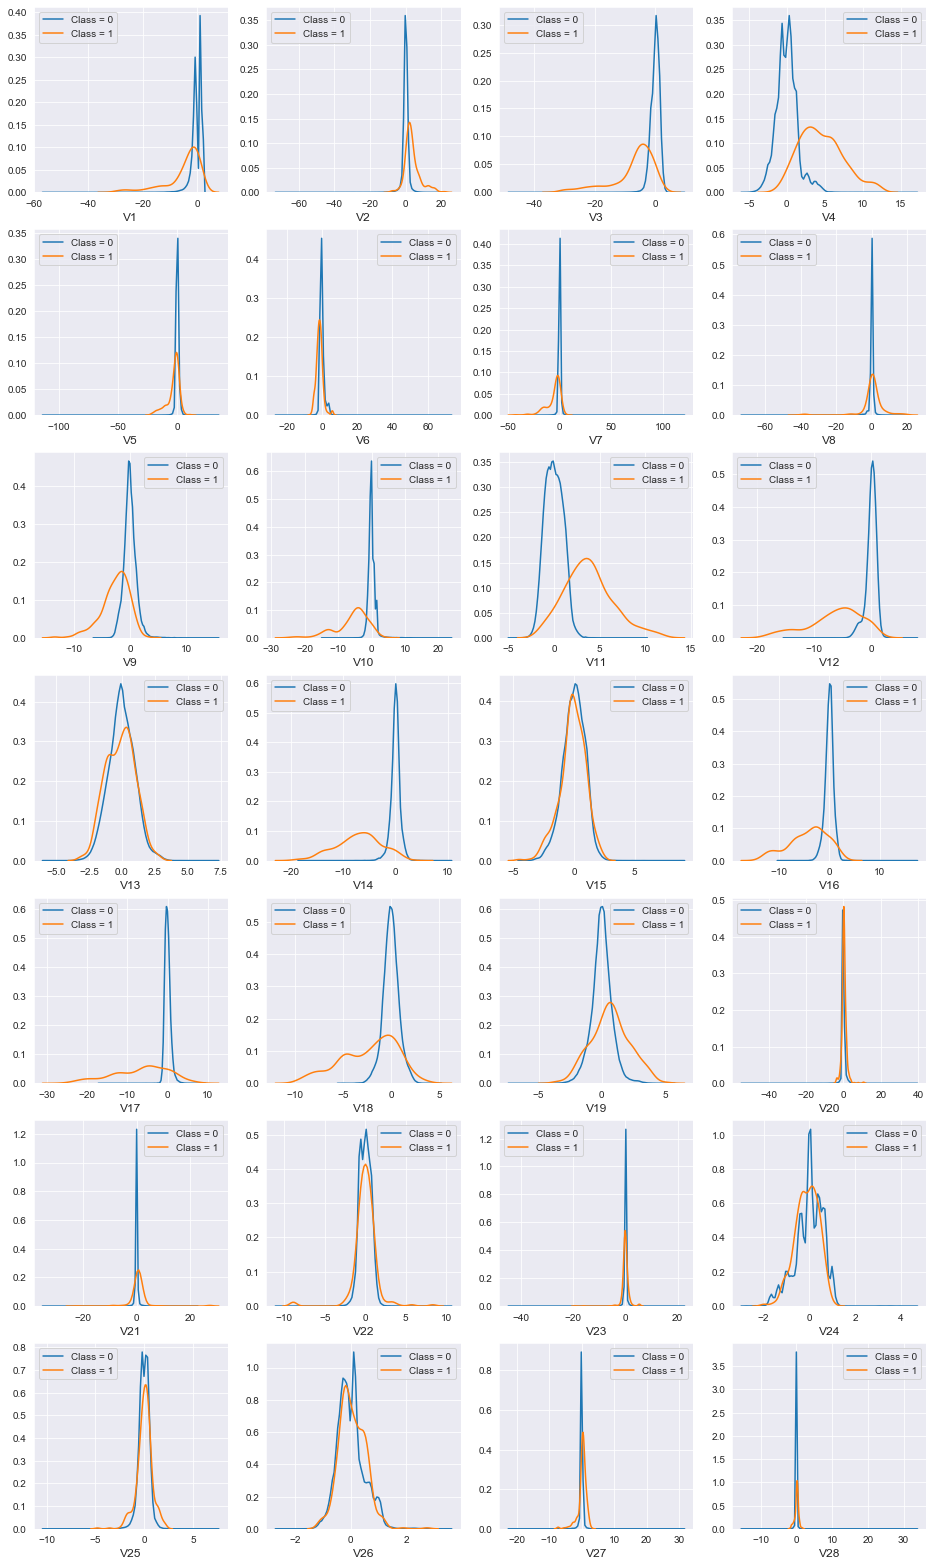

In [38]:
### Looking the V's features
var = df.iloc[:,1:29].columns
#var = data_df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('darkgrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(7,4,i)
    sns.kdeplot(t0[feature], bw='scott',label="Class = 0")
    sns.kdeplot(t1[feature], bw='scott',label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
plt.show();

### Feature Correlation

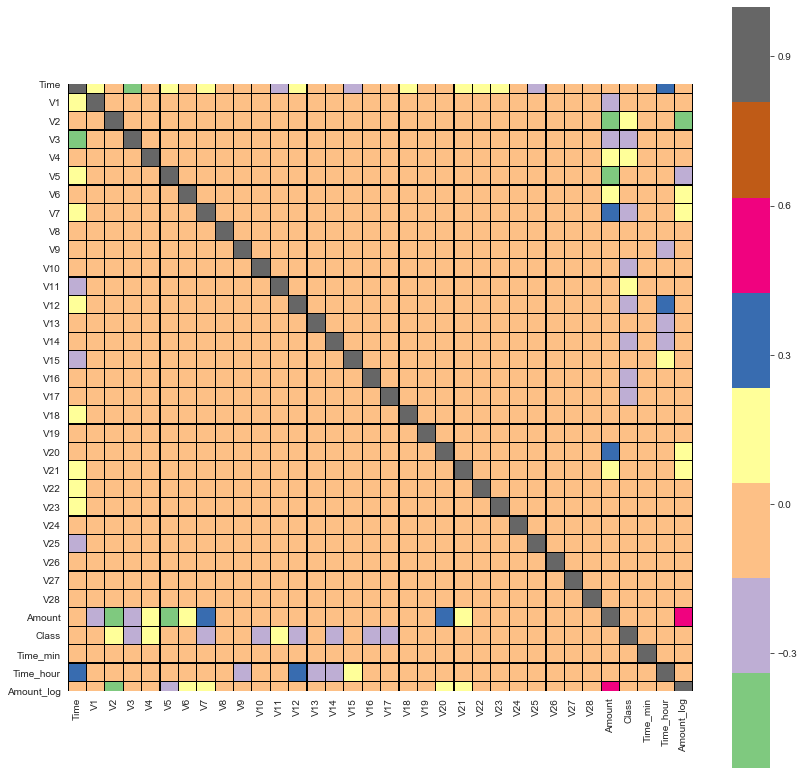

In [39]:
plt.figure(figsize = (14,14))
corr = df.corr()
sns.heatmap(corr, linewidths=0.2,vmax=1.0, 
            square=True, cmap = plt.cm.Accent, linecolor='black')
plt.show;

In [40]:
corr['Class'].sort_values(ascending=False)

Class         1.000000
V11           0.154876
V4            0.133447
V2            0.091289
V21           0.040413
V19           0.034783
V20           0.020090
V8            0.019875
V27           0.017580
V28           0.009536
Amount        0.005632
V26           0.004455
V25           0.003308
V22           0.000805
Time_min     -0.000124
V23          -0.002685
V15          -0.004223
V13          -0.004570
V24          -0.007221
Time         -0.012323
Amount_log   -0.016747
Time_hour    -0.017109
V6           -0.043643
V5           -0.094974
V9           -0.097733
V1           -0.101347
V18          -0.111485
V7           -0.187257
V3           -0.192961
V16          -0.196539
V10          -0.216883
V12          -0.260593
V14          -0.302544
V17          -0.326481
Name: Class, dtype: float64

In [41]:
pd.crosstab(df['Class'] == 1, df['Amount'], margins=True).T

Class,False,True,All
Amount,,,
0.0,1798,27,1825
0.01,713,5,718
0.02,85,0,85
0.03,3,0,3
0.04,11,0,11
...,...,...,...
12910.93,1,0,1
18910.0,1,0,1
19656.53,1,0,1


<a id='430'></a>
### C. Data Preprocessing

#### Drop unwanted columns

In [44]:
#column unnamed is just index.
#column Time I shrinked it to minutes and hours and I don't need it anymore.
#column Amount, I already created the Amount_log for that.
df.drop(columns=['Time','Amount'], axis=1, inplace=True)

In [45]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'Time_min',
       'Time_hour', 'Amount_log'],
      dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   V1          284807 non-null  float64
 1   V2          284807 non-null  float64
 2   V3          284807 non-null  float64
 3   V4          284807 non-null  float64
 4   V5          284807 non-null  float64
 5   V6          284807 non-null  float64
 6   V7          284807 non-null  float64
 7   V8          284807 non-null  float64
 8   V9          284807 non-null  float64
 9   V10         284807 non-null  float64
 10  V11         284807 non-null  float64
 11  V12         284807 non-null  float64
 12  V13         284807 non-null  float64
 13  V14         284807 non-null  float64
 14  V15         284807 non-null  float64
 15  V16         284807 non-null  float64
 16  V17         284807 non-null  float64
 17  V18         284807 non-null  float64
 18  V19         284807 non-null  float64
 19  V2

<a id='431'></a>
### C.1. Model Resampling

So far, we analyzed our data and we found out that our target 'Class' is highly imbalanced. We have couple of solutions as follow:<br>

1- Leave the data as it is and use the imbalanced dataset which results is *overfitting*.<br>

2- Undersapmle the majority class: undersample the majority class means we have 472 class fraud and 282542 class non_fraud and reduce the number of non_fraud to 472 to balance our data with fraud class. However, this is not the best approach as we discarded many useful information which again results in *overfitting* due to we trow away many information.<br>

3- Oversample the minority class: oversample the minority class could be a good option in our case. This means we will use SMOTE which works by creating synthetic observations based upon the existing minority observations. One important thing to notice is that we have to do SMOTE during the cross validation and not before cross validation. The reason for that is because if we do SMOTE before cross validation, the training and validation set contain the same sample, resulting in overfitting and data leakage, hence misleading results.

In [47]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score

In [48]:
X = df.drop(['Class'], axis=1).values
y= df['Class'].values

In [49]:
# the function that we will use to better evaluate the model
def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f2: {}".format(fbeta_score(true_value, pred, beta=2)))

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

classifier = RandomForestClassifier

# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), \
                                   classifier(random_state=42))

smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)

#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE().fit_sample(X, y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 284315, 1: 492})
SMOTE data distribution: Counter({0: 284315, 1: 284315})


Good, here we've synthetically increased our data set using SMOTE oversample method and now we've a balanced the dataset.

Now, we will use binary **classification performances measurements** to evaluate the performance of our model. Here, I explained the definition and how you calculate each performance.<br>

**Confusion Matrix:** we will use confusion matrix to evaluate the performance of the classification model. 

**Classification Accuracy:** (TP + TN) / (TP + TN + FP + FN)<br>

**Precision:** proportion of predicted positives which are actual positive (or Positive predictive value), TP / (TP + FP)<br>

**Recall:** proportion of actual positives which are predicted positive, TP / (TP + FN)<br>

**F1-score:** harmonic mean between precision and recall, 2 * (precision * recall) / (precision + recall)


In [50]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, smote_prediction))

print('SMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test, y_test)))

print_results("SMOTE + RandomForest classification", y_test, smote_prediction)

Confusion Matrix:
[[56853    11]
 [   16    82]]
SMOTE Pipeline Score 0.9995259997893332
SMOTE + RandomForest classification
accuracy: 0.9995259997893332
precision: 0.8817204301075269
recall: 0.8367346938775511
f2: 0.845360824742268


Recall: FN is very important for us here. 

<a id='432'></a>
### C.2. Feature Importance

In [51]:
import xgboost as xgb
    
model = xgb.XGBRegressor()
model.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

In [52]:
columns = df.columns.drop('Class')
columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Time_min',
       'Time_hour', 'Amount_log'],
      dtype='object')

[Text(0, 0, 'V1'),
 Text(0, 0, 'V2'),
 Text(0, 0, 'V3'),
 Text(0, 0, 'V4'),
 Text(0, 0, 'V5'),
 Text(0, 0, 'V6'),
 Text(0, 0, 'V7'),
 Text(0, 0, 'V8'),
 Text(0, 0, 'V9'),
 Text(0, 0, 'V10'),
 Text(0, 0, 'V11'),
 Text(0, 0, 'V12'),
 Text(0, 0, 'V13'),
 Text(0, 0, 'V14'),
 Text(0, 0, 'V15'),
 Text(0, 0, 'V16'),
 Text(0, 0, 'V17'),
 Text(0, 0, 'V18'),
 Text(0, 0, 'V19'),
 Text(0, 0, 'V20'),
 Text(0, 0, 'V21'),
 Text(0, 0, 'V22'),
 Text(0, 0, 'V23'),
 Text(0, 0, 'V24'),
 Text(0, 0, 'V25'),
 Text(0, 0, 'V26'),
 Text(0, 0, 'V27'),
 Text(0, 0, 'V28'),
 Text(0, 0, 'Time_min')]

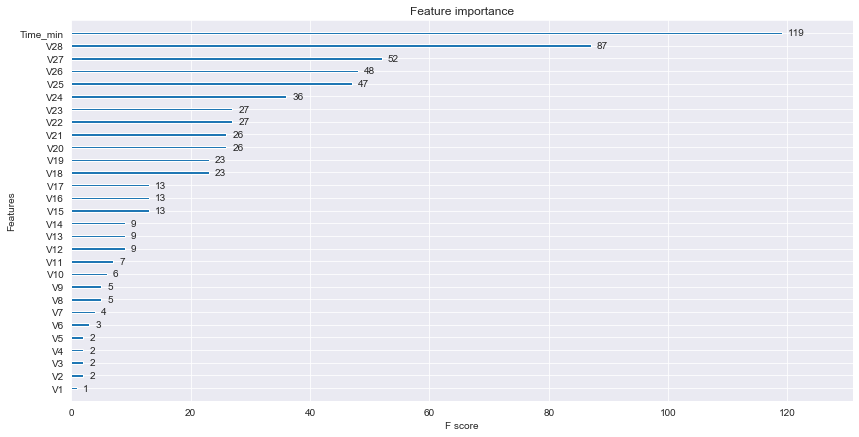

In [53]:
plt.rcParams["figure.figsize"] = (14, 7)
xgb.plot_importance(model, ).set_yticklabels(columns)

Very cool. It seems that using XGBRegressor for feature importance, 'Time_min' feature has the most effect on fraud detection.

<a id='433'></a>
### C.3. Normalize Data

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
standard_scaler = StandardScaler()

X_scaled = standard_scaler.fit_transform(X)

In [58]:
column_names = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Time_min', 'Time_hour', 'Amount_log']
df_scaled = pd.DataFrame(data = X_scaled, columns=column_names)

In [59]:
df_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Time_min,Time_hour,Amount_log
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,-1.663837,-2.40693,1.020920
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-1.663837,-2.40693,-0.964665
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,-1.663837,-2.40693,1.479755
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,-1.663837,-2.40693,0.926114
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-1.663837,-2.40693,0.645496


<a id='5'></a>
### 5. Model developement
    A. XGBoost
    B. PCA
    C. GridSeachCV
    D. RandomForestClassifer
    E. AdaboostClassifier
    F. CatboostClassifier
    G. Keras

<a id='51'></a>
### A. Model prediction with XGBoost

In [60]:
X = df_scaled.values
y= df['Class'].values

In [61]:
X.shape, y.shape

((284807, 31), (284807,))

In [62]:
# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [63]:
from xgboost import XGBClassifier

In [64]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=1000)

In [65]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [66]:
pred = xgb.predict(X_test)

In [67]:
accuracy_score(y_test, pred)

0.9995962220427653

In [68]:
recall_score(y_test, pred)

0.7959183673469388

In [69]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.80      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



<a id='52'></a>
### B. Model prediction with PCA

In [70]:
from sklearn.decomposition import PCA

In [71]:
pca = PCA(n_components=20)

In [72]:
pca_selected = pca.fit_transform(X)

In [73]:
pca_selected.shape

(284807, 20)

In [74]:
pca.explained_variance_

array([1.55994273, 1.51700915, 1.03065591, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351])

The pca.explained_variance_ shows that most of our features are very important for model prediction.

In [75]:
# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(pca_selected, y, random_state=2, test_size=0.20)

In [76]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [77]:
pred = xgb.predict(X_test)

In [78]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56886
           1       0.85      0.93      0.89        76

    accuracy                           1.00     56962
   macro avg       0.92      0.97      0.94     56962
weighted avg       1.00      1.00      1.00     56962



<a id='53'></a>
### C. GridSearch

In [84]:
from sklearn.model_selection import GridSearchCV

In [81]:
# combination of 3x3=9 hyperparameters
params = [{'learning_rate': [0.1, 0.01, 0.001], 
          'n_estimators':[100, 500, 1000]}]

In [82]:
grid_search = GridSearchCV(xgb, params, cv=5, scoring='recall', return_train_score=True)

In [103]:
#grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator

<a id='54'></a>
### D. Model prediction with RandomForestClassifier

In [85]:
rfc = RandomForestClassifier(n_estimators=100, criterion='gini', 
                             n_jobs=-1, random_state=42, verbose=False)

In [86]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42,
                       verbose=False, warm_start=False)

In [87]:
pred = rfc.predict(X_test)

In [88]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56889
           1       0.81      0.93      0.87        73

    accuracy                           1.00     56962
   macro avg       0.90      0.97      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [89]:
roc_auc_score(y_test, pred)

0.9047179510363869

<a id='55'></a>
### E. Model prediction with AdaBoostClassifier

In [90]:
abc = AdaBoostClassifier(n_estimators=100, learning_rate=0.9,
                         algorithm='SAMME.R', random_state=42)

In [91]:
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.9,
                   n_estimators=100, random_state=42)

In [92]:
pred = abc.predict(X_test)

In [93]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56885
           1       0.77      0.84      0.81        77

    accuracy                           1.00     56962
   macro avg       0.89      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [94]:
roc_auc_score(y_test, pred)

0.8867992729635191

<a id='56'></a>
### F. Model prediction with CatBoostClassifier 

In [95]:
cbc = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=100)

In [96]:
cbc.fit(X_train, y_train, verbose=True)

0:	total: 673ms	remaining: 5m 35s
50:	total: 25.2s	remaining: 3m 41s
100:	total: 48.5s	remaining: 3m 11s
150:	total: 1m 12s	remaining: 2m 47s
200:	total: 1m 33s	remaining: 2m 18s
250:	total: 1m 52s	remaining: 1m 51s
300:	total: 2m 11s	remaining: 1m 27s
350:	total: 2m 33s	remaining: 1m 5s
400:	total: 2m 55s	remaining: 43.2s
450:	total: 3m 15s	remaining: 21.2s
499:	total: 3m 36s	remaining: 0us


In [97]:
pred = cbc.predict(X_test)

In [98]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56887
           1       0.83      0.93      0.88        75

    accuracy                           1.00     56962
   macro avg       0.92      0.97      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [99]:
roc_auc_score(y_test, pred)

0.9166227129411489

<a id='57'></a>
### G. Run the deep learning model: using Keras Multilayer Perceptron (MLP)

In [100]:
from sklearn.model_selection import StratifiedKFold
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense # Fully connected layers
from keras.layers import Dropout #regularization, prevent overfitting, randomly turn off some neurons at each epoch
tf.__version__ , keras.__version__

('1.13.2', '2.2.4-tf')

In [102]:
# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = []

for train, test in kfold.split(X, y):
    
    # Define Keras Model and network architecture
    model = Sequential()
    # hidden layer 1
    model.add(Dense(units=50, input_dim=31, kernel_initializer='uniform', activation='relu'))
    # hidden layer 2
    model.add(Dense(units=50, kernel_initializer='uniform', activation='relu'))
    # hidden layer 3
    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    print(model.summary())

    
    # Compile Keras Model
    model.compile(optimizer='adam' ,loss='binary_crossentropy', metrics=['accuracy'])
    # efficient stochastic gradient descent algorithm “adam“
    # binary classification problems then using binary_crossentropy
    # because it is a classification problem, we will collect and report the classification accuracy

    # Fit Keras Model
    model.fit(X[train], y[train], batch_size=32, epochs=100, verbose=1, validation_split=0.2)

    # Evaluate Keras Model
    scores = model.evaluate(X[test], y[test], verbose=1)
    print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))
    cv_scores.append(scores[1] * 100)
print('%.2f%% (+/- %.3f%%)' % (np.mean(cv_scores), np.std(cv_scores)))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                1600      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 4,201
Trainable params: 4,201
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Train on 182276 samples, validate on 45569 samples
Epoch 1/100
182276/182276 [==============================] - 7s 39us/step - loss: 0.0102 - acc: 0.9987 - val_loss: 0.0027 - val_acc: 0.9996
Epoch 2/100
182276/182276 [==============================] - 6s 36us/step - loss: 0.0032 - acc: 0.9993 - val_loss: 0.0025 - val_acc: 0.9996
Epoch 3/100
182276/1

<a id='6'></a>
### 6. References

[Dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud)<br>